## Project Introduction : 
In this project, our aim is to create a smart predictive model that can figure out why accidents happen. This model will consider certain factors, such as the type of vehicle involved, the time of the accident, and the weather conditions. By doing so, we hope to understand the reasons behind accidents and work towards preventing them in the future.

We're also using a bunch of information about crashes to see if we can predict how many people might get hurt in an accident. The predictive model will even try to guess if an accident might be really bad and result in someone getting seriously hurt or worse.


#### Why is this important :

Last year, there were more than 30,000 accidents in the United States, and nearly 10,000 of them led to serious injuries or even death. Considering that Chicago is known for being bicycle-friendly, our predictions could help people be more careful in places where there have been a lot of accidents, especially the dangerous ones.

#### Problems we're trying to investigate:
- Can our predictive model use the type of vehicle, the time of the accident, and the weather to predict why an accident happened?
- Is it possible for our predictive model to guess how many injuries might happen in an accident by looking at the time of day, weather, and other things?
- How do a person's age and gender help our predictive model understand how badly they might get hurt in an accident?
- Is it possible to develop a predictive model for determining the severity of crashes based on various features which is present in Crashes Dataset.


## Any changes since the proposal:

Our scope remains consistent with the initial proposal outlined in the check-in proposal slides. There have been no removals or additions to our plan since the proposal submission. We are diligently following the outlined objectives and research questions to develop a predictive model for understanding the primary causes of accidents, predicting injury outcomes, and assessing fatality risks based on specific attributes. Our commitment to these goals remains unwavering, ensuring continuity in our approach and objectives.

In [1]:
# created this from the chicago dataset information
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", "tfoqsIhnFlDq4L73gLxM6Zuvy")

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get_all("85ca-t3if")
results2 = client.get_all("68nd-jvt3")
results3 = client.get_all("u6pd-qa9d")

# results_df_Crashes = pd.DataFrame.from_records(results)
# results_df_Vehicles = pd.DataFrame.from_records(results2)
# results_df_People = pd.DataFrame.from_records(results3)


## Data Preparation

We're working with three different sets of information: crashes dataset, vehicle dataset, and people dataset. These datasets contain details about the crashes, the vehicles involved, and the people affected by the crashes. In the Crash Dataset, we have 766,000 rows with 49 columns of data. The original size of the vehicle dataset is 780 megabytes, encompassing 1.56 million rows and 72 columns. The people dataset provides information about individuals involved in a crash, including whether any injuries occurred which encompases 1.68 million rows and 30 columns.

To link information across these datasets, we utilize a unique identifier known as the crash ID, which is present in all datasets. This helps us connect the data points. In situations where multiple vehicles are part of a single crash, we identify and select the vehicle responsible for causing the crash.

**Data Sources:**
- Crashes Dataset: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if
- Vehicle Dataset: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3
- People Dataset: https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

So far we have:

- Removed columns with missing values using `dropna()` to ensure clean datasets.
- Dropped unnecessary fields with less significance using `drop()` to streamline the dataset.
- Converted categorical data into numerical format through label encoding using `LabelEncoder()` for better compatibility with machine learning algorithms.
- Scaled the dataset using `StandardScaler()` to normalize the features, preventing any single column from dominating the training process.
- Using visualization techniques, we identified and subsequently removed outliers from our dataset.


## Exploratory Data Analysis:

Originally, the vehicle dataset contained a substantial 1.5 million rows and 71 columns. However, many of these columns were redundant and not conducive to building our model. Consequently, we meticulously removed these unnecessary columns, retaining only the ones deemed valuable. This refinement resulted in a more streamlined dataset, reducing its size from 780 megabytes to a more manageable 100 megabytes.

To ensure data quality, we excluded rows with null values in the crash ID and vehicle ID fields. For the remaining columns, any missing values were filled with either the mean or mode of their respective columns. Addressing outliers, particularly in the number of passengers and vehicle year, was crucial. We took steps to eliminate these outliers to enhance the dataset's accuracy.

Post these preparatory steps, our final vehicle dataset comprises 777,963 rows. This dataset will undergo further reduction upon integration with the people dataset and the crash dataset. To facilitate the creation of prediction models, we utilized Label Encoder, a tool that assigns numerical values to categorical variables. This ensures compatibility with the algorithms we intend to use in our modeling process.

In [2]:
import pandas as pd
results_df_Crashes = pd.read_csv('Crashes-Crashes.csv')
results_df_People = pd.read_csv('Crashes-People.csv')
results_df_Vehicles = pd.read_csv('Crashes-Vehicles.csv')

/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_9693/3075826201.py:3: DtypeWarning: Columns (20,24,25,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  results_df_People = pd.read_csv('Crashes-People.csv')
/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_9693/3075826201.py:4: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types. Specify dtype option on import or set low_memory=False.
  results_df_Vehicles = pd.read_csv('Crashes-Vehicles.csv')


In [13]:
# describe all the data of Crashes
results_df_Crashes.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,777963.00000,1.990060e+05,777963.000000,777958.000000,777963.000000,776261.000000,776261.000000,776261.000000,776261.000000,776261.000000,776261.000000,776261.0,777963.000000,777963.000000,777963.000000,772754.000000,772754.000000
mean,28.39675,1.333032e+01,3685.876596,1242.611790,2.034768,0.188728,0.001192,0.020112,0.106704,0.060721,2.004795,0.0,13.206010,4.123227,6.691210,41.854814,-87.673513
std,6.19297,2.961623e+03,2888.513769,705.382248,0.452365,0.564495,0.037436,0.166067,0.421350,0.317084,1.159561,0.0,5.565678,1.980436,3.366798,0.334214,0.679025
min,0.00000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.00000,2.000000e+00,1245.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782364,-87.721645
50%,30.00000,2.000000e+00,3200.000000,1211.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874687,-87.674044
75%,30.00000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924284,-87.633266
max,99.00000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [5]:
results_df_Crashes.columns

results_df_Crashes

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,JG412655,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,JG434996,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,JG361138,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,JG376618,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,JG387648,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777958,7100975b248ca3a09078c78c90cecf6ccd6be4a7915952...,JG469677,NaN,10/17/2023 11:58:00 AM,25,NO CONTROLS,NO CONTROLS,UNKNOWN,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,11,3,10,41.767284,-87.621978,POINT (-87.621978182267 41.767284301708)
777959,7cb67bfcb4d68e0dd48367a2ff938e3242923c835e8f05...,JG468544,NaN,10/18/2023 11:50:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,...,0.0,0.0,1.0,0.0,11,4,10,42.010575,-87.816251,POINT (-87.816251139383 42.010575059576)
777960,edd2f774156e1119f03dda4a5036475f77faee775f27e7...,JG465895,NaN,10/16/2023 11:00:00 AM,5,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,11,2,10,41.696233,-87.595806,POINT (-87.59580619714 41.696232527674)
777961,4d25e7ff14d3acd319b6d1be86130619ea04cd92e6fc20...,JG470604,NaN,10/19/2023 01:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,1.0,0.0,1.0,0.0,13,5,10,41.865979,-87.744610,POINT (-87.744609883514 41.865979486289)


In [25]:
#Drop all NA and fill the other unknown values with mode and 0 values with mean
results_df_Vehicles.dropna(subset = ['CRASH_RECORD_ID', 'CRASH_DATE', 'VEHICLE_ID'],inplace = True)
results_df_Vehicles['UNIT_TYPE'].fillna(value = results_df_Vehicles['UNIT_TYPE'].mode()[0], inplace = True)
results_df_Vehicles['NUM_PASSENGERS'].fillna(value = results_df_Vehicles['NUM_PASSENGERS'].mean(), inplace = True)
results_df_Vehicles['MAKE'].fillna(value = results_df_Vehicles['MAKE'].mode()[0], inplace = True)
results_df_Vehicles['LIC_PLATE_STATE'].fillna(value = results_df_Vehicles['LIC_PLATE_STATE'].mode()[0], inplace = True)
results_df_Vehicles['VEHICLE_YEAR'].fillna(value = results_df_Vehicles['VEHICLE_YEAR'].mean(), inplace = True)
results_df_Vehicles['VEHICLE_DEFECT'].fillna(value = results_df_Vehicles['VEHICLE_DEFECT'].mode()[0], inplace = True)
results_df_Vehicles['VEHICLE_USE'].fillna(value = results_df_Vehicles['VEHICLE_USE'].mode()[0], inplace = True)
results_df_Vehicles['TRAVEL_DIRECTION'].fillna(value = results_df_Vehicles['TRAVEL_DIRECTION'].mode()[0], inplace = True)
results_df_Vehicles.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1554880,91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...,JG223284,04/14/2023 02:05:00 PM,1,DRIVER,1.471714,1478881.0,NaN,FORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,1.471714,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,1.471714,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,1.471714,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1554881,91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...,JG223284,04/14/2023 02:05:00 PM,2,DRIVER,1.000000,1478892.0,NaN,ISUZU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
results_df_Vehicles = results_df_Vehicles.drop(results_df_Vehicles.columns[[0, 2, 4, 8, 10, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]], axis=1)
results_df_Vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1550830 entries, 0 to 1587148
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   CRASH_RECORD_ID   1550830 non-null  object 
 1   CRASH_DATE        1550830 non-null  object 
 2   UNIT_TYPE         1550830 non-null  object 
 3   NUM_PASSENGERS    1550830 non-null  float64
 4   VEHICLE_ID        1550830 non-null  float64
 5   MAKE              1550830 non-null  object 
 6   LIC_PLATE_STATE   1550830 non-null  object 
 7   VEHICLE_YEAR      1550830 non-null  float64
 8   VEHICLE_DEFECT    1550830 non-null  object 
 9   VEHICLE_USE       1550830 non-null  object 
 10  TRAVEL_DIRECTION  1550830 non-null  object 
dtypes: float64(3), object(8)
memory usage: 142.0+ MB


# Visualization 1 (Trends of Crashes)
- In the below Visualization we are trying to understand what are the time where the crashes are most probable to happen, so that if there are any trends we can observe them and use that to predict in machine learning models

- This code snippet uses Matplotlib to create line plots representing hourly, daily, and monthly trends in crash data. Three subplots display trends over different time intervals, helping to visualize patterns and variations in the dataset. The color-coded lines and markers enhance clarity in understanding the trends.

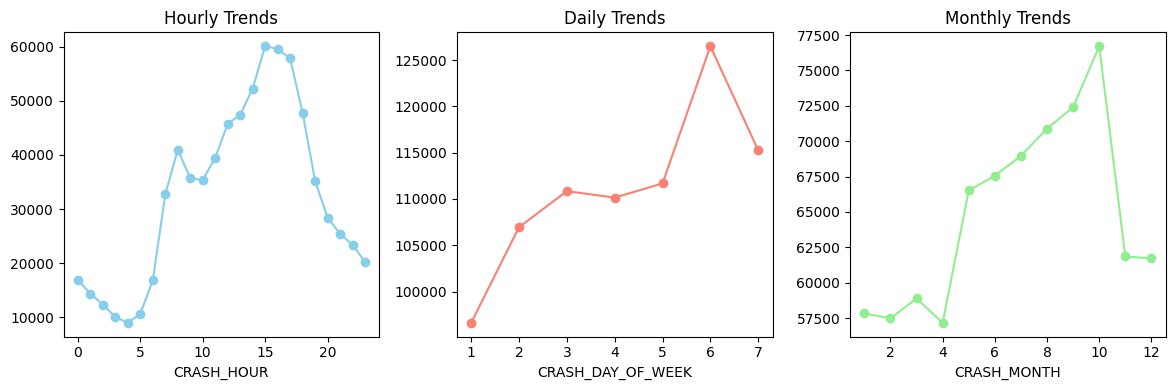

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

data = results_df_Crashes

# Create line plots for temporal trends
hourly_trends = data.groupby('CRASH_HOUR').size()
daily_trends = data.groupby('CRASH_DAY_OF_WEEK').size()
monthly_trends = data.groupby('CRASH_MONTH').size()

plt.figure(figsize=(12, 4))
plt.subplot(131)
hourly_trends.plot(kind='line', marker='o', color='skyblue')
plt.title('Hourly Trends')

plt.subplot(132)
daily_trends.plot(kind='line', marker='o', color='salmon')
plt.title('Daily Trends')

plt.subplot(133)
monthly_trends.plot(kind='line', marker='o', color='lightgreen')
plt.title('Monthly Trends')

plt.tight_layout()
plt.show()


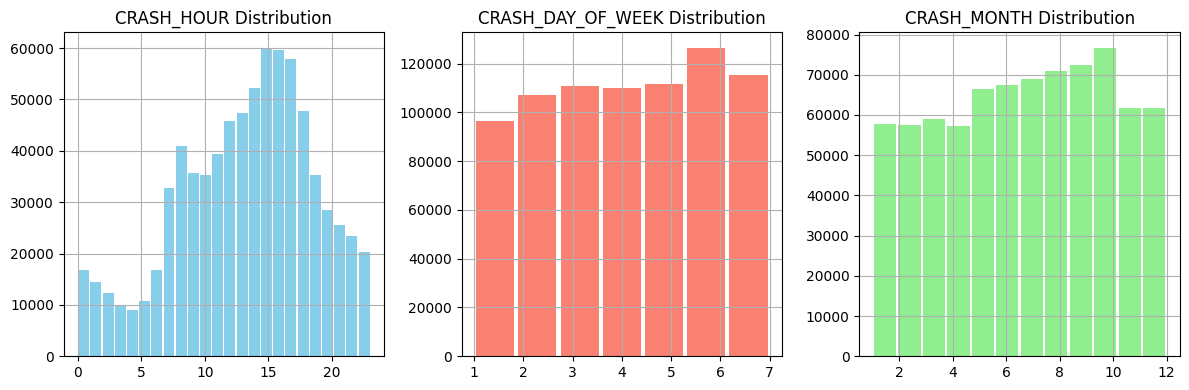

In [ ]:
import matplotlib.pyplot as plt

# Create histograms
plt.figure(figsize=(12, 4))
plt.subplot(131)
data['CRASH_HOUR'].hist(rwidth=0.9, bins=24, color='skyblue')
plt.title('CRASH_HOUR Distribution')

plt.subplot(132)
data['CRASH_DAY_OF_WEEK'].hist(rwidth=0.9, bins=7, color='salmon')
plt.title('CRASH_DAY_OF_WEEK Distribution')

plt.subplot(133)
data['CRASH_MONTH'].hist(rwidth=0.9, bins=12, color='lightgreen')
plt.title('CRASH_MONTH Distribution')

plt.tight_layout()
plt.show()


# Visualization 2 ( Areas Affected by Crashes)

- We aim to visualize high-impact areas from crash data to inform the design of a predictive model. By identifying these areas, we can warn users about the elevated likelihood of crashes, enhancing safety measures based on data analysis.

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import display


results_df_Crashes = results_df_Crashes.dropna(subset=['LATITUDE', 'LONGITUDE'])


# Create a Folium Map centered around a specific location (e.g., average latitude and longitude)
map_center = [results_df_Crashes['LATITUDE'].mean(), results_df_Crashes['LONGITUDE'].mean()]
heatmap_map = folium.Map(location=map_center, zoom_start=10)



# Create a list of coordinates from the cleaned data while checking against the threshold
heat_data = []
latitude_dict = {}
longitude_dict = {}

for index, row in results_df_Crashes.iterrows():
    latitude, longitude = row['LATITUDE'], row['LONGITUDE']
    if latitude not in latitude_dict:
        latitude_dict[latitude] = 1
    else:
        latitude_dict[latitude] += 1
    if longitude not in longitude_dict:
        longitude_dict[longitude] = 1
    else:
        longitude_dict[longitude] += 1
    if latitude_dict[latitude] < 100 and longitude_dict[longitude] < 100:
        heat_data.append([latitude, longitude])
    else:
        break  # Stop recording once the threshold is exceeded

if heat_data:
    # Calculate the map center based on the heatmap data
    map_center = [sum(coord[0] for coord in heat_data) / len(heat_data), sum(coord[1] for coord in heat_data) / len(heat_data)]

    # Create a map centered on the heatmap data
    heatmap_map = folium.Map(location=map_center, zoom_start=10)

    # Add a HeatMap layer to the map
    HeatMap(heat_data).add_to(heatmap_map)

    # Display the heatmap in the cell output
    display(heatmap_map)
else:
    print("No heatmap data to display.")


# Visualization 3 (Weather Conditions and Injuries Total)

- What weather conditions have the most significant impact on injuries and crashes? Identifying the key factors will help us understand the conditions that predominantly contribute to accidents.

/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_76464/4009387975.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='WEATHER_CONDITION', y='INJURIES_FATAL', data=grouped_data, palette="viridis")
/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_76464/4009387975.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


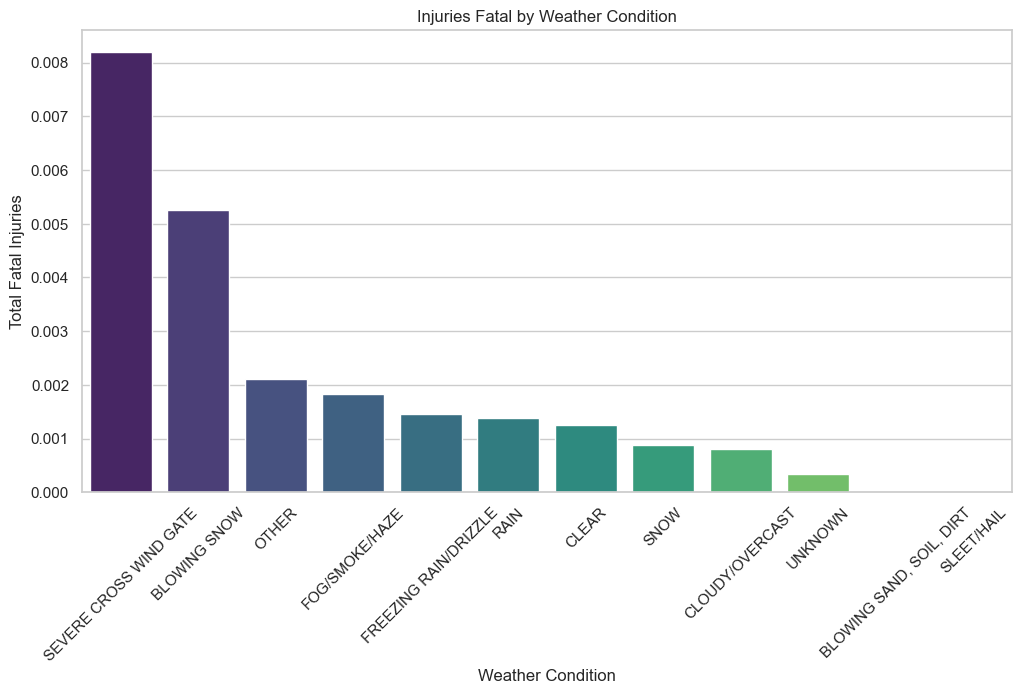

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
data = results_df_Crashes

columns_of_interest = ['WEATHER_CONDITION', 'INJURIES_FATAL']

data = data.dropna(subset=columns_of_interest)

plt.figure(figsize=(12, 6))

grouped_data = data.groupby('WEATHER_CONDITION')['INJURIES_FATAL'].mean().reset_index()
grouped_data = grouped_data.sort_values(by='INJURIES_FATAL', ascending=False)

sns.set(style="whitegrid")
g = sns.barplot(x='WEATHER_CONDITION', y='INJURIES_FATAL', data=grouped_data, palette="viridis")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title('Injuries Fatal by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Fatal Injuries')

plt.show()


# Visualization 4 & 5

- What streets are most susceptible to crashes due to weather conditions? Similarly, which lighting conditions have the greatest impact, and which streets are most affected by them?

<Figure size 1200x600 with 0 Axes>

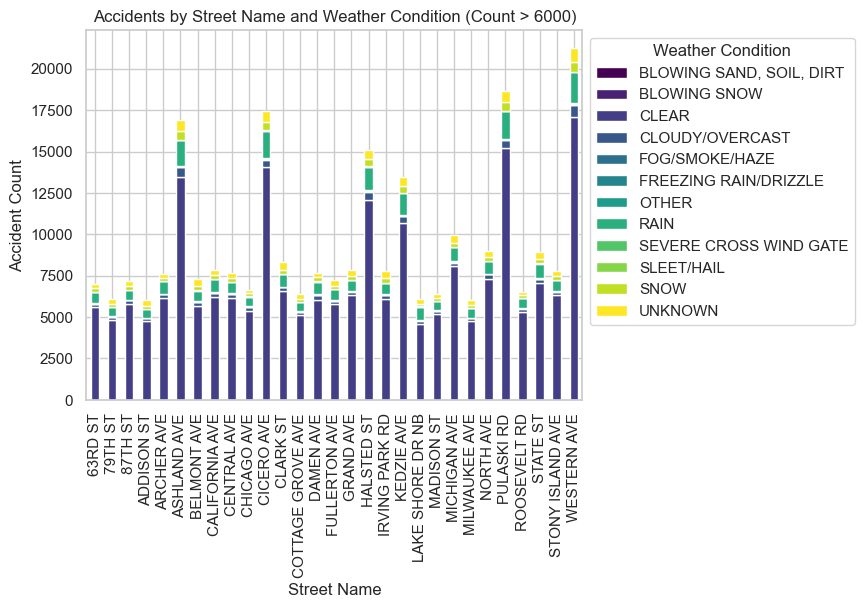

<Figure size 1200x600 with 0 Axes>

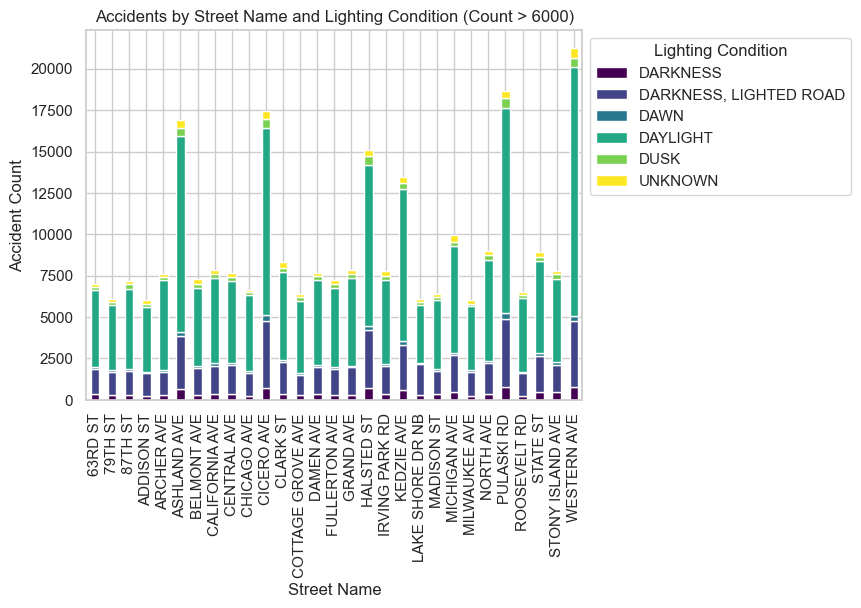

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = results_df_Crashes

columns_of_interest = ['STREET_NAME', 'WEATHER_CONDITION', 'LIGHTING_CONDITION']

data = data.dropna(subset=columns_of_interest)

grouped_data_weather = data.groupby(['STREET_NAME', 'WEATHER_CONDITION']).size().unstack().fillna(0)

grouped_data_weather = grouped_data_weather[grouped_data_weather.sum(axis=1) > 6000]

bar_width = 0.7
bar_spacing = 0.7
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
g = grouped_data_weather.plot(kind='bar', stacked=True, colormap='viridis')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Accidents by Street Name and Weather Condition (Count > 6000)')
plt.xlabel('Street Name')
plt.ylabel('Accident Count')
plt.legend(title='Weather Condition', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

grouped_data_lighting = data.groupby(['STREET_NAME', 'LIGHTING_CONDITION']).size().unstack().fillna(0)

grouped_data_lighting = grouped_data_lighting[grouped_data_lighting.sum(axis=1) > 6000]

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
g = grouped_data_lighting.plot(kind='bar', stacked=True, colormap='viridis')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Accidents by Street Name and Lighting Condition (Count > 6000)')
plt.xlabel('Street Name')
plt.ylabel('Accident Count')
plt.legend(title='Lighting Condition',  loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# Visualization 6

Draw Box Plots for Different Features:

Visualize the spread and central tendencies of each feature using box plots to identify potential variations in the data.
Identify Outliers:

Use statistical measures and visual inspection of box plots to pinpoint outliers, ensuring a robust understanding of the dataset's distribution.

CRASH_RECORD_ID      object
CRASH_DATE           object
UNIT_TYPE            object
NUM_PASSENGERS        int64
VEHICLE_ID          float64
MAKE                 object
LIC_PLATE_STATE      object
VEHICLE_YEAR        float64
VEHICLE_DEFECT       object
VEHICLE_USE          object
TRAVEL_DIRECTION     object
dtype: object


(0.0, 10.0)

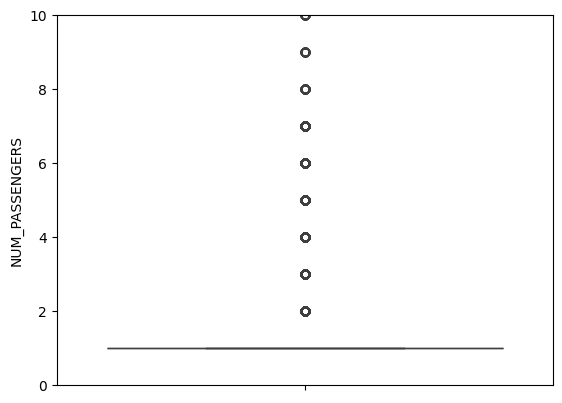

In [27]:
import seaborn as sns

results_df_Vehicles = results_df_Vehicles.astype({'NUM_PASSENGERS':'int'})
print(results_df_Vehicles.dtypes)
a = sns.boxplot(results_df_Vehicles['NUM_PASSENGERS'])
a.set_ylim(0,10)

# Visualization 7

375


<Axes: ylabel='VEHICLE_YEAR'>

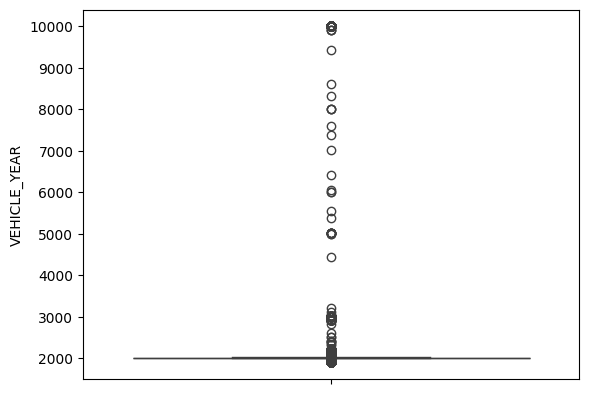

In [28]:
ind = results_df_Vehicles[(results_df_Vehicles['NUM_PASSENGERS'] > 8)].index.tolist()
print(len(ind))
results_df_Vehicles.drop(ind, inplace = True)
results_df_Vehicles = results_df_Vehicles.astype({'LIC_PLATE_STATE':'str'})
sns.boxplot(results_df_Vehicles['VEHICLE_YEAR'])

# Visualization 8

This code filters out outlier values in the 'VEHICLE_YEAR' column from results_df_Vehicles by removing entries with years beyond 2023 and below 1950. The subsequent boxplot with seaborn visually represents the distribution of the remaining 'VEHICLE_YEAR' values after the removal of outliers.

1463
367


<Axes: ylabel='VEHICLE_YEAR'>

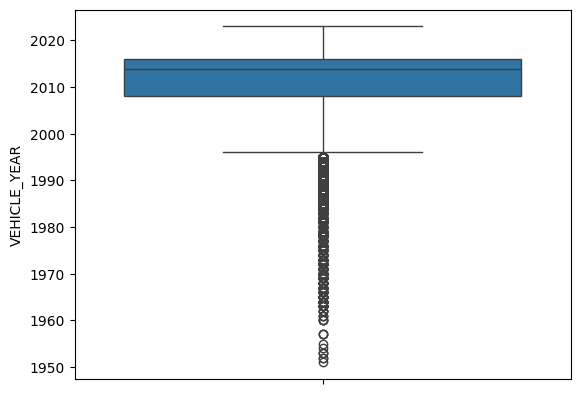

In [29]:
ind = results_df_Vehicles[(results_df_Vehicles['VEHICLE_YEAR'] > 2023)].index.tolist()
print(len(ind))
results_df_Vehicles.drop(ind, inplace = True)
ind = results_df_Vehicles[(results_df_Vehicles['VEHICLE_YEAR'] < 1950)].index.tolist()
print(len(ind))
results_df_Vehicles.drop(ind, inplace = True)
sns.boxplot(results_df_Vehicles['VEHICLE_YEAR'])

# Machine Learning Model 1

The objective is to develop a predictive model for determining the severity of crashes based on various features. These features encompass a range of factors such as weather conditions, road type, time of day, and potentially others that contribute to the overall understanding of the circumstances surrounding a crash. By analyzing and correlating these features with the severity of crashes, the goal is to establish a robust predictive framework. This model will aid in assessing the potential impact of different variables on the severity of accidents, ultimately providing valuable insights for improving road safety measures and emergency response protocols.

We have achieved an accuracy of 90 percent using the below model.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
le = LabelEncoder()

data = results_df_Crashes


# Drop unnecessary columns
data = data.drop(columns=['CRASH_RECORD_ID', 'RD_NO', 'DATE_POLICE_NOTIFIED', 'LOCATION'])

# Feature engineering and encoding categorical variables
categorical_columns = [
    'TRAFFIC_CONTROL_DEVICE',
    'DEVICE_CONDITION',
    'WEATHER_CONDITION',
    'LIGHTING_CONDITION',
    'FIRST_CRASH_TYPE',
    'TRAFFICWAY_TYPE',
    'ALIGNMENT',
    'ROADWAY_SURFACE_COND',
    'ROAD_DEFECT',
    'REPORT_TYPE',
    'INTERSECTION_RELATED_I',
    'NOT_RIGHT_OF_WAY_I',
    'HIT_AND_RUN_I',
    'DAMAGE',
    'PRIM_CONTRIBUTORY_CAUSE',
    'SEC_CONTRIBUTORY_CAUSE',
    'STREET_DIRECTION',
    'STREET_NAME',
    'STATEMENTS_TAKEN_I',
    'DOORING_I',
    'WORK_ZONE_I',
    'WORK_ZONE_TYPE',
    'WORKERS_PRESENT_I',
    'MOST_SEVERE_INJURY',
]

data = data[categorical_columns + ['CRASH_TYPE']]
y = data['CRASH_TYPE']

for col in categorical_columns:
    data = pd.concat([data, pd.get_dummies(data[col], prefix=col, drop_first=True)], axis=1)
    data = data.drop(columns=[col])

# Split the dataset into features and target
X = data.drop(columns=['CRASH_TYPE'])


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (if necessary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model selection and tuning
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)


Accuracy: 0.90
                                  precision    recall  f1-score   support

INJURY AND / OR TOW DUE TO CRASH       0.85      0.74      0.79     41197
          NO INJURY / DRIVE AWAY       0.91      0.95      0.93    113354

                        accuracy                           0.90    154551
                       macro avg       0.88      0.85      0.86    154551
                    weighted avg       0.89      0.90      0.89    154551



# Machine Learning Model 2

We aim to determine the primary cause of crashes by considering factors such as vehicle type, crash time, and weather conditions. Three models (Logistic Regression, Decision Tree, Random Forest) were defined, trained on scaled training data, and assessed for accuracy on both training and testing sets, with the resulting accuracies provided.

In [ ]:
Crashes_data = results_df_Crashes
Crashes_data.drop(Crashes_data.columns[[1, 2, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 46, 47, 48]], axis=1)


,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,FAILING TO REDUCE SPEED TO AVOID CRASH,0.0,14,7,7
18,fd05285e9d273fe20cbbebf84794045828a2ba589073b6...,07/29/2023 02:30:00 PM,10,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,14,7,7
19,fda2491d33ac819033f4aaa7ed901120f2f6785b7e5bbb...,07/29/2023 12:50:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DARKNESS,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,0,7,7
27,4a1f7a24129e5e1d4a7a2fd44ab6f8822a20bcdb2f627f...,08/13/2023 10:10:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,10,1,8
28,1ee2180a89cc02c0b756f95b5b2755bb5cc9d93450f5ca...,08/09/2023 07:55:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING IMPROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,UNABLE TO DETERMINE,5.0,19,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777958,7100975b248ca3a09078c78c90cecf6ccd6be4a7915952...,10/17/2023 11:58:00 AM,25,NO CONTROLS,NO CONTROLS,UNKNOWN,DAYLIGHT,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,11,3,10
777959,7cb67bfcb4d68e0dd48367a2ff938e3242923c835e8f05...,10/18/2023 11:50:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,11,4,10
777960,edd2f774156e1119f03dda4a5036475f77faee775f27e7...,10/16/2023 11:00:00 AM,5,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,11,2,10
777961,4d25e7ff14d3acd319b6d1be86130619ea04cd92e6fc20...,10/19/2023 01:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,IMPROPER TURNING/NO SIGNAL,1.0,13,5,10


In [ ]:
from sklearn.preprocessing import LabelEncoder

text_col = ['TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION','WEATHER_CONDITION','LIGHTING_CONDITION','CRASH_TYPE','PRIM_CONTRIBUTORY_CAUSE','INJURIES_TOTAL']
c_data = pd.DataFrame()
for col in text_col:
    encoder = LabelEncoder()
    c_data[col] = encoder.fit_transform(Crashes_data[col])

col = ['CRASH_DATE',
 'POSTED_SPEED_LIMIT',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH']
cn_data = pd.DataFrame(Crashes_data[col])

df = pd.merge(c_data, cn_data, left_index=True, right_index=True)
df.dropna
df

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,INJURIES_TOTAL,CRASH_DATE,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
2,16,1,2,0,1,36,0,07/29/2023 02:45:00 PM,30,14,7,7
18,17,6,11,5,1,36,0,07/29/2023 02:30:00 PM,10,14,7,7
19,4,3,2,3,1,21,0,07/29/2023 12:50:00 AM,30,0,7,7
27,4,3,2,3,1,23,0,08/13/2023 10:10:00 AM,30,10,1,8
28,4,3,7,3,0,39,1,08/09/2023 07:55:00 PM,30,19,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...
772749,4,3,11,3,1,36,0,07/29/2023 08:00:00 AM,30,8,7,7
772750,4,3,2,3,1,36,0,03/18/2019 06:28:00 AM,30,6,2,3
772751,4,3,2,3,1,36,0,12/28/2021 02:30:00 AM,30,2,3,12
772752,16,1,2,3,0,24,1,02/11/2019 10:15:00 AM,30,10,2,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.drop('CRASH_DATE', axis=1)
y = df['PRIM_CONTRIBUTORY_CAUSE']
X = df.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# we have used 3 models in our project

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear', random_state=0)),
    ('Decision Tree', DecisionTreeClassifier(random_state=1, max_depth=5)),
    ('Random Forest', RandomForestClassifier(random_state=1, max_depth=5)),
]

trained_model = {}

for model_name, model in models:
    clf = model.fit(X_train_scaled, y_train)
    trained_model[model_name] = clf
    y_train_pred = clf.predict(X_train_scaled)
    y_test_pred = clf.predict(X_test_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f'{model_name} - Accuracy Score Train: {train_accuracy}')
    print(f'{model_name} - Accuracy Score Test: {test_accuracy}')


Logistic Regression - Accuracy Score Train: 0.38785302427385043
Logistic Regression - Accuracy Score Test: 0.3877776137163107
Decision Tree - Accuracy Score Train: 0.3920984354701221
Decision Tree - Accuracy Score Test: 0.3920683036140811
Random Forest - Accuracy Score Train: 0.39212821476829846
Random Forest - Accuracy Score Test: 0.39208133202470186


# Machine Learning Model 3

In the analysis of crash data, employing PCA (Principal Component Analysis) and K-means clustering using attributes such as 'CRASH_TYPE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'PRIM_CONTRIBUTORY_CAUSE', 'ROADWAY_SURFACE_COND', and 'MOST_SEVERE_INJURY' offers several advantages for understanding and improving crash models.

- Dimensionality Reduction with PCA:
    - PCA helps in reducing the dimensionality of the dataset by transforming the original attributes into a set of linearly uncorrelated variables called principal components.
    - By reducing the number of features, PCA simplifies the complexity of the dataset, making it computationally more efficient and aiding in the identification of the most influential variables contributing to crash outcomes.

- K-means Clustering:
    - K-means clustering is a powerful unsupervised learning technique that groups data points into distinct clusters based on similarity.
    - Clustering allows for the identification of patterns within the data, helping to group similar instances of crashes together. This assists in recognizing commonalities and differences among crashes, which can inform targeted interventions and policies.
Integration of Attributes:

- The chosen attributes, encompassing factors like weather conditions, device status, and primary contributory causes, provide a holistic view of the circumstances surrounding crashes.

- Integrating these diverse attributes into the clustering process allows for a comprehensive understanding of the complex interactions and relationships between various elements, enabling more nuanced insights into crash patterns.

- In summary, utilizing PCA and K-means clustering in the analysis of crash attributes offers a powerful means to extract meaningful patterns, simplify data representation, and gain actionable insights. This approach contributes to a more informed and targeted approach for improving road safety and reducing the severity of crashes.

/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_76464/2786535634.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_76464/2786535634.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_76464/2786535634.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

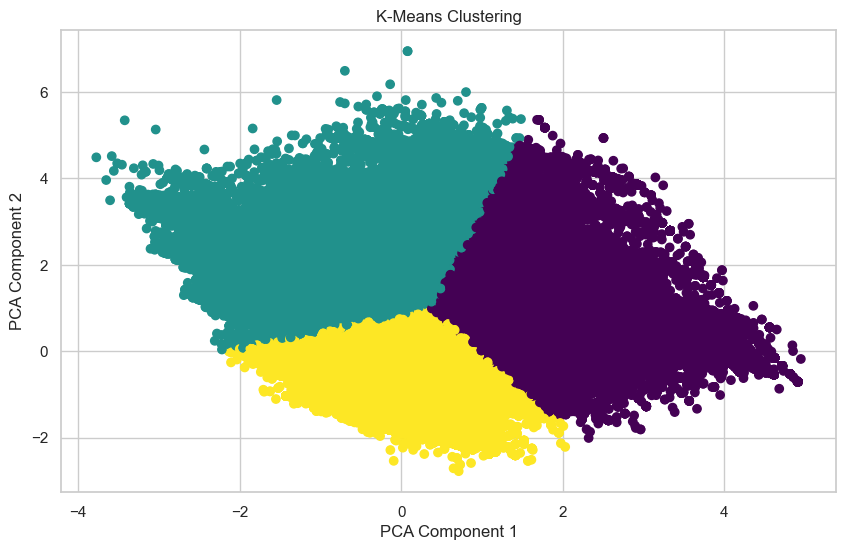

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = results_df_Crashes

# Data Preprocessing

features = [
    'DEVICE_CONDITION',
    'WEATHER_CONDITION',
    'LIGHTING_CONDITION',
    'POSTED_SPEED_LIMIT',
    'PRIM_CONTRIBUTORY_CAUSE',
    'ROADWAY_SURFACE_COND',
    'MOST_SEVERE_INJURY',
    'CRASH_TYPE',
]

# Extract the selected features
X = data[features]

# Preprocess categorical features with Label Encoding
categorical_cols = ['CRASH_TYPE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'PRIM_CONTRIBUTORY_CAUSE', 'ROADWAY_SURFACE_COND', 'MOST_SEVERE_INJURY']
le = LabelEncoder()

for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering')
plt.show()



GNN to classify the serverity

In [75]:
import numpy as np
import osmnx as ox
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors, cm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.nn as pyg_nn

from torch import Tensor
from torch.nn import Parameter
from torch_geometric.io import read_npz
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.nn.inits import reset, uniform, zeros
from torch_geometric.typing import OptTensor, OptPairTensor, Adj, Size
from torch_geometric.data import Data, DataLoader, InMemoryDataset, download_url

from pylab import cm
from matplotlib import colors
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, roc_auc_score

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np
from IPython.display import clear_output
np.random.seed(7)
torch.manual_seed(7)
plt.style.use("ggplot")

In [18]:
results_df_Crashes.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [84]:
unique_streets = results_df_Crashes['MOST_SEVERE_INJURY'].unique()
unique_streets

array(['INCAPACITATING INJURY', 'NO INDICATION OF INJURY',
       'NONINCAPACITATING INJURY', 'FATAL', 'REPORTED, NOT EVIDENT', nan],
      dtype=object)

In [9]:
unique_streets = results_df_Crashes['STREET_NAME'].unique()

result  = results_df_Crashes.groupby('STREET_NAME').size().sort_values(ascending=False)



STREET_NAME
WESTERN AVE          21262
PULASKI RD           18675
CICERO AVE           17434
ASHLAND AVE          16925
HALSTED ST           15114
                     ...  
NETTLETON AVE            1
NEW HAMPSHIRE AVE        1
82ND                     1
NORWOOD AVE              1
100TH DR                 1
Length: 1630, dtype: int64


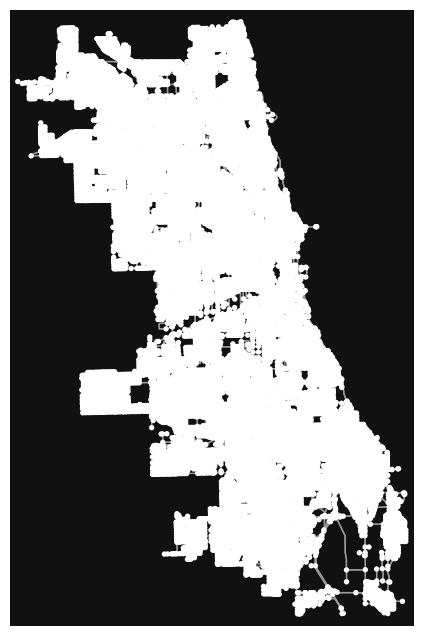

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [76]:
G = ox.graph_from_place('Chicago, IL, USA', network_type='drive')
ox.plot_graph(G)

In [ ]:
def create_osmnx_graph(lat, lon):
    location = (lat, lon)
    graph = ox.graph_from_point(location, network_type='drive')
    return graph

graph_df = results_df_Crashes.dropna(subset=['LATITUDE', 'LONGITUDE'])
graph_df_point = graph_df[['LATITUDE', 'LONGITUDE','LOCATION']]
graph_df_point.head()


df = results_df_Crashes.dropna(subset=['LATITUDE', 'LONGITUDE'])

columns = ['CRASH_DATE', 'LATITUDE', 'LONGITUDE', 'MOST_SEVERE_INJURY']
df = df[columns]

df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

df = df.sort_values(by='CRASH_DATE')

label_encoder = LabelEncoder()
df['MOST_SEVERE_INJURY'] = label_encoder.fit_transform(df['MOST_SEVERE_INJURY'])

# def create_osmnx_graph(lat, lon):
#     location = (lat, lon)
#     graph = ox.graph_from_point(location, network_type='drive')
#     return graph

# def get_osmnx_node_features(graph):
#     max_attributes = max(len(node[1]) for node in graph.nodes(data=True))
#     node_features = []

#     for node in graph.nodes(data=True):
#         features = [float(val) if isinstance(val, (int, float)) else 0.0 for val in node[1].values()]
#         features = features + [0.0] * (max_attributes - len(features))  # Pad with zeros
#         node_features.append(features)

#     return torch.tensor(node_features, dtype=torch.float)


# def get_max_label(lat, lon):
#     subset = df[(df['LATITUDE'] == lat) & (df['LONGITUDE'] == lon)]
#     if not subset.empty:
#         max_label = subset['MOST_SEVERE_INJURY'].max()
#         return max_label.item()  # Convert to a scalar
#     else:
#         return None

# data_list = []

# for index, row in df.iterrows():
#     lat, lon, label = row['LATITUDE'], row['LONGITUDE'], row['MOST_SEVERE_INJURY']
    
#     graph = create_osmnx_graph(lat, lon)
#     y = torch.tensor([get_max_label(lat, lon)], dtype=torch.float)  # Use y for the label
    
#     edge_index = torch.tensor(list(graph.edges)).t().contiguous()
    
#     # Add OSMnx attributes as node features
#     osmnx_node_features = get_osmnx_node_features(graph)  # Adjust max_attributes as needed
#     x = osmnx_node_features
#     data = Data(x=x, edge_index=edge_index, y=y)  # Use y as the label
#     data_list.append(data)

# # Concatenate the data instances into a single Data object
# data = Data.from_data_list(data_list)

graph = ox.graph_from_place('Chicago, IL, USA', network_type='drive')

def get_max_label(lat, lon):
    subset = df[(df['LATITUDE'] == lat) & (df['LONGITUDE'] == lon)]
    if not subset.empty:
        max_label = subset['MOST_SEVERE_INJURY'].max()
        return max_label.item()  # Convert to a scalar
    else:
        return None

def find_nearest_node(graph, lat, lon):
    node, dist = ox.distance.nearest_nodes(graph, lon, lat, return_dist=True)
    return node, dist

data_list = []

for index, row in df.iterrows():
    lat, lon, label = row['LATITUDE'], row['LONGITUDE'], row['MOST_SEVERE_INJURY']

    nearest_node, distance = find_nearest_node(graph, lat, lon)
    
    nearest_label = get_max_label(lat, lon)

    node_attributes = graph.nodes[nearest_node]
    
    x = node_attributes.values()
    
    y = torch.tensor([nearest_label if nearest_label is not None else label], dtype=torch.float)

    edge_index = torch.tensor(list(graph.edges)).t().contiguous()
    
    data = Data(x=x, edge_index=edge_index, y=y, pos=torch.tensor([[lat, lon]]))
    data_list.append(data)

data = Data.from_data_list(data_list)

In [ ]:
np.savez('chicago_il.npz', x=data.x.numpy(), edge_index=data.edge_index.numpy(), y=data.y.numpy(), pos=data.pos.numpy())


In [ ]:
import torch
import numpy as np
import os.path as osp
from typing import Callable, Optional
from torch_geometric.data import Data, InMemoryDataset
          
class TRAVELDataset(InMemoryDataset):
    r"""
    Args:
        root (string): Root directory where the dataset should be saved.
        name (string): The name of the dataset.
        transform (callable, optional): A function/transform that takes in an
            :obj:`torch_geometric.data.Data` object and returns a transformed
            version. The data object will be transformed before every access.
            (default: :obj:`None`)
        pre_transform (callable, optional): A function/transform that takes in
            an :obj:`torch_geometric.data.Data` object and returns a
            transformed version. The data object will be transformed before
            being saved to disk. (default: :obj:`None`)
    """
    
    def __init__(self, root: str, name: str,
                 transform: Optional[Callable] = None,
                 pre_transform: Optional[Callable] = None):
        self.name = name.lower()
        super().__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])
        
    @property
    def raw_dir(self) -> str:
        return osp.join(self.root, self.name, 'raw')

    @property
    def processed_dir(self) -> str:
        return osp.join(self.root, self.name, 'processed')

    @property
    def raw_file_names(self) -> str:
        return f'{self.name}.npz'

    @property
    def processed_file_names(self) -> str:
        return 'data.pt'

    def process(self):
        data = read_npz(self.raw_paths[0])
        data = data if self.pre_transform is None else self.pre_transform(data)
        data, slices = self.collate([data])
        torch.save((data, slices), self.processed_paths[0])

    def __repr__(self) -> str:
        return f'{self.name.capitalize()}Full()'

def read_npz(path):
    with np.load(path, allow_pickle=True) as f:
        return parse_npz(f)


def parse_npz(f):
    crash_time = f['crash_time']
    x = torch.from_numpy(f['x']).to(torch.float)
    coords = torch.from_numpy(f['coordinates']).to(torch.float)
    edge_attr = torch.from_numpy(f['edge_attr']).to(torch.float)
    cnt_labels = torch.from_numpy(f['cnt_labels']).to(torch.long)
    occur_labels = torch.from_numpy(f['occur_labels']).to(torch.long)
    edge_attr_dir = torch.from_numpy(f['edge_attr_dir']).to(torch.float)
    edge_attr_ang = torch.from_numpy(f['edge_attr_ang']).to(torch.float)
    severity_labels = torch.from_numpy(f['severity_8labels']).to(torch.long)
    edge_index = torch.from_numpy(f['edge_index']).to(torch.long).t().contiguous()
    return Data(x=x, y=severity_labels, occur_labels=occur_labels, edge_index=edge_index, 
                edge_attr=edge_attr, edge_attr_dir=edge_attr_dir, edge_attr_ang=edge_attr_ang, 
                coords=coords, cnt_labels=cnt_labels, crash_time=crash_time)





In [126]:
dataset = TRAVELDataset('./chicago_il/raw/', 'chicago_il')
data = dataset[0]
print(data)
print(f'Number of graphs: {len(dataset)}')
print(f'Number of node features: {dataset.num_features}')
print(f'Number of edge features: {dataset.num_edge_features}')
print(f'Number of classes: {dataset.num_classes}')
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')

Data(x=[28706, 9], edge_index=[2, 76166], edge_attr=[76166, 18], y=[28706], occur_labels=[28706], edge_attr_dir=[76166, 2], edge_attr_ang=[76166, 3], coords=[28706, 2], cnt_labels=[28706], crash_time=[28706, 2])
Number of graphs: 1
Number of node features: 9
Number of edge features: 18
Number of classes: 8
Number of nodes: 28706
Number of edges: 76166


In [137]:
def train(model, data, optimizer):
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model()[data.train_mask], data.y[data.train_mask]).backward()
    optimizer.step()

    
@torch.no_grad()
def test(model, data):
    model.eval()
    logits, measures = model().detach(), []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        pred = logits[mask].max(1)[1]
        mea = f1_score(data.y[mask].cpu(), pred.cpu(), average='weighted')
        measures.append(mea)
    label_pred = logits.max(1)[1]

    mask = data.test_mask
    scores = logits[mask][:, 1]
    pred = logits[mask].max(1)[1]
    test_y = data.y[mask]
    
    test_acc = pred.eq(test_y).sum().item() / mask.sum().item()
    return measures, label_pred, test_acc

def train_loop(model, data, optimizer, num_epochs, model_name='', city_name=''):
    epochs, train_measures, valid_measures, test_measures, test_accs = [], [], [], [], []
    coords = data.coords.cpu().numpy()
    gdf_pred = pd.DataFrame({'x': coords[:, 0], 'y': coords[:, 1]})
    for epoch in range(num_epochs):
        train(model, data, optimizer)
        log = 'Epoch: {:03d}, Train: {:.4f}, Val: {:.4f}, Test: {:.4f}'
        measures, label_pred, test_acc = test(model, data)
        train_mea, valid_mea, test_mea = measures
        epochs.append(epoch)
        train_measures.append(train_mea)
        valid_measures.append(valid_mea)
        test_measures.append(test_mea)
        test_accs.append(test_acc)
        
        if epoch % 20 == 0:
            clear_output(True)
            fig, (ax1, ax) = plt.subplots(1, 2, figsize=(30, 12))  
            gdf_pred['label'] = label_pred.cpu().numpy()
            for i in range(class_num):
                G = nx.MultiGraph()
                G.add_nodes_from(gdf_pred[gdf_pred['label'] == i].index)
                sub1 = nx.draw(G, ax=ax1, pos=pos_dict, node_color=colors.rgb2hex(cmap_points(i)), node_size=10, label=i)

            ax.text(1, 1, log.format(epoch, train_measures[-1], valid_measures[-1], test_measures[-1]), fontsize=18)
            ax.plot(epochs, train_measures, "r", epochs, valid_measures, "g", epochs, test_measures, "b")
            ax.set_ylim([0, 1])
            ax.legend(["train", "valid", "test"])  
            norm = colors.BoundaryNorm(boundaries=range(8), ncolors=8)
            plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap_map), ax=ax1, orientation='vertical', label='Severity') 
            ax1.set_title(city_name+' '+model_name, y=-0.01)
            plt.show()

    select_idx = np.argmax(valid_measures[num_epochs//2:]) + num_epochs//2
    final_test_mea = np.array(test_measures)[select_idx]
    final_test_acc = np.array(test_accs)[select_idx]
    print('F measure {:.5f} | Test Accuracy {:.5f}'.format(final_test_mea, final_test_acc))
    return (round(final_test_mea*100, 2), round(final_test_acc*100, 2))

class GCN(torch.nn.Module):
    def __init__(self, hidden_dim=d):
        super(GCN, self).__init__()
        self.conv1 = pyg_nn.GCNConv(dataset.num_features, hidden_dim)
        self.conv2 = pyg_nn.GCNConv(hidden_dim, hidden_dim)
        self.fc1 = nn.Linear(hidden_dim, dataset.num_classes)

    def forward(self):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=p, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = self.fc1(x)
        return F.log_softmax(x, dim=1)

d=16
p=0.5
all_res = []
class_num = 8
num_epochs = 1000
file_path = 'exp-severity/'
cmap_points = cm.get_cmap('cool', class_num)
cmap_map = cm.get_cmap('viridis', class_num)

/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_9693/3423986654.py:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_points = cm.get_cmap('cool', class_num)
/var/folders/rx/c264lbnd6ws42tkcmdqfl9y80000gn/T/ipykernel_9693/3423986654.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_map = cm.get_cmap('viridis', class_num)


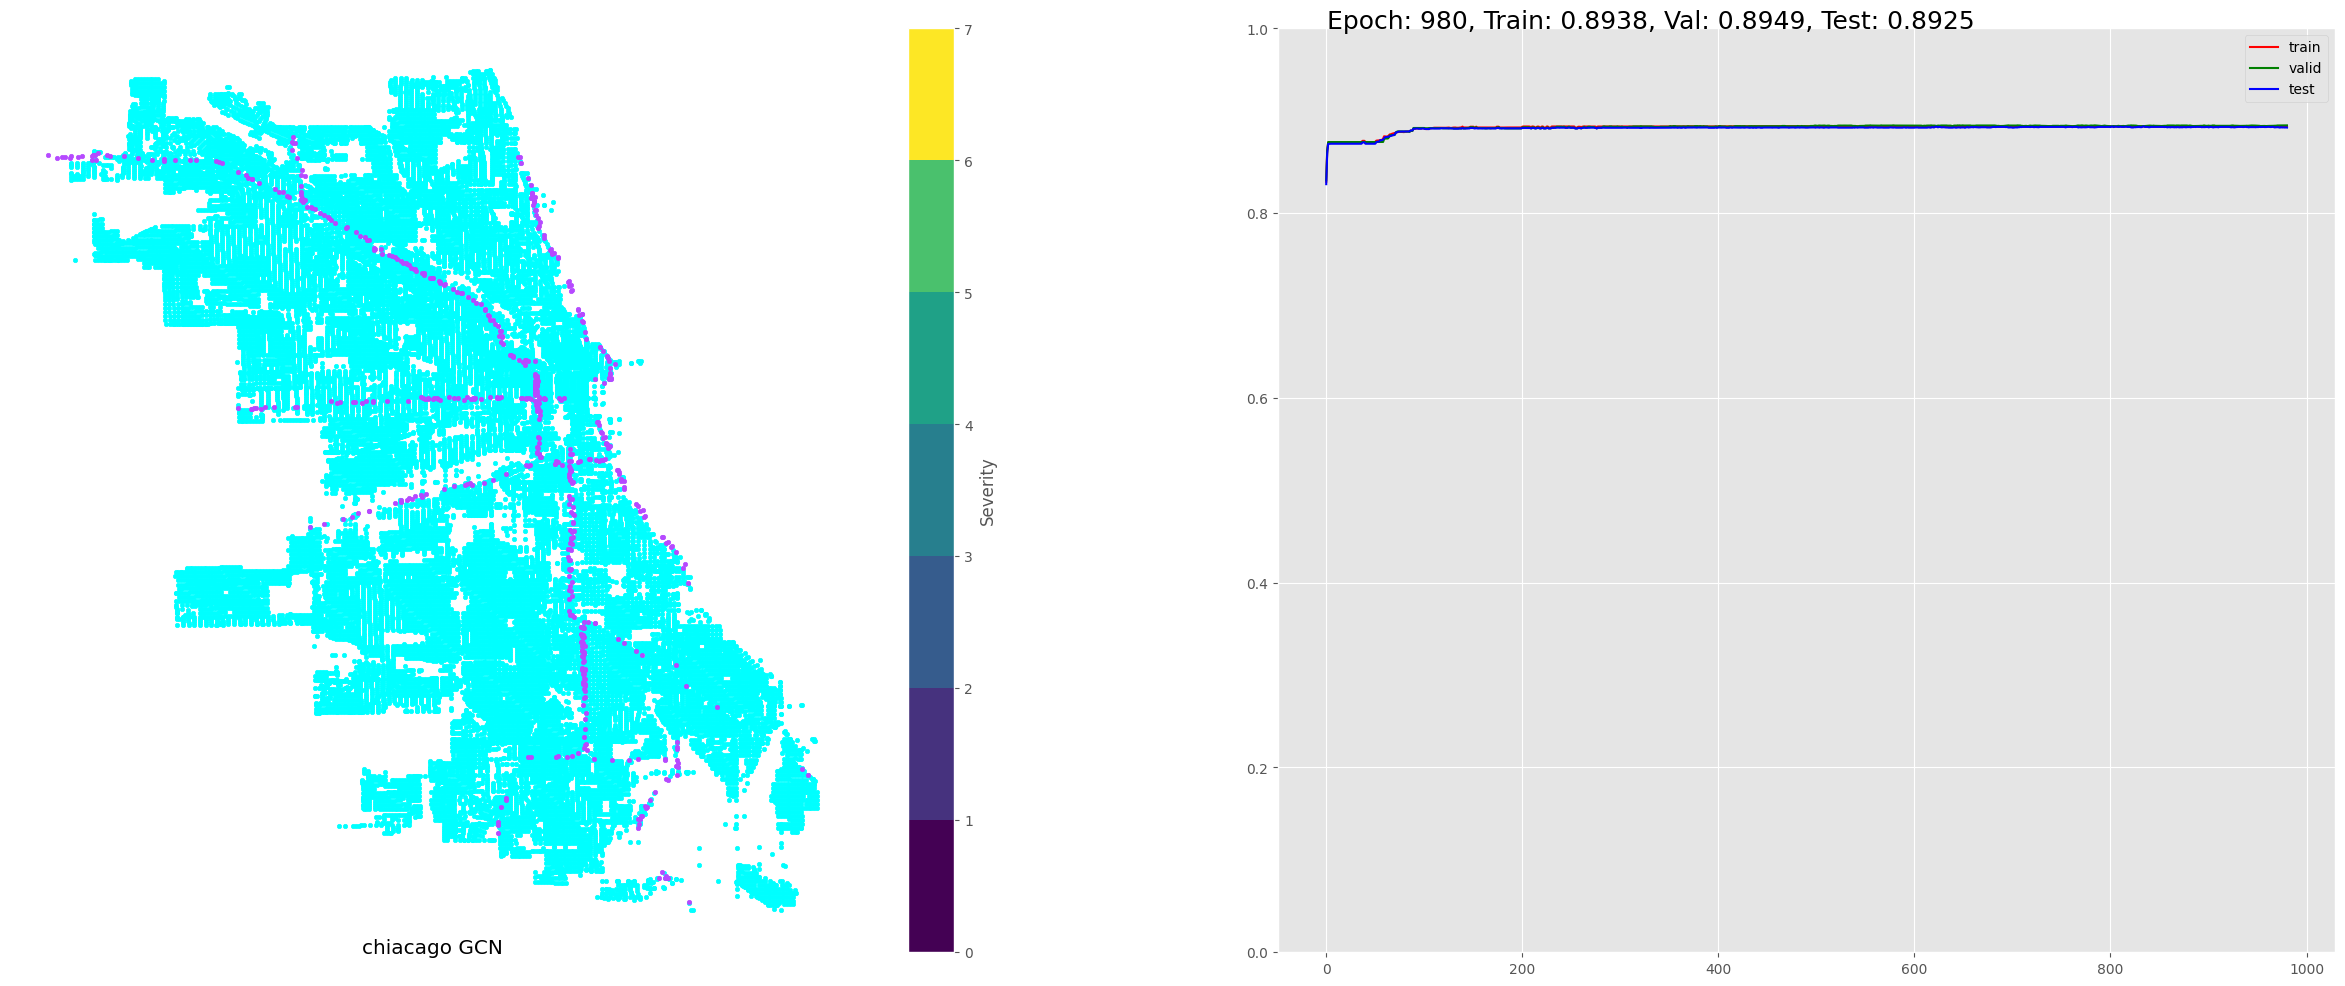

F measure 0.89254 | Test Accuracy 0.91875
('GCN', 89.25, 91.88)


In [138]:
data.train_mask, data.val_mask, data.test_mask = train_test_split_stratify(dataset, train_ratio=0.6, val_ratio=0.2, class_num=class_num)
sc = MinMaxScaler()
data.x[data.train_mask] = torch.tensor(sc.fit_transform(data.x[data.train_mask]), dtype=torch.float)
data.x[data.val_mask] = torch.tensor(sc.transform(data.x[data.val_mask]), dtype=torch.float)
data.x[data.test_mask] = torch.tensor(sc.transform(data.x[data.test_mask]), dtype=torch.float)

edge_attr_all = MinMaxScaler().fit_transform(data.edge_attr.cpu()) 
edge_attr_all = torch.tensor(edge_attr_all).float()

coords = data.coords.numpy()
gdf_pred = pd.DataFrame({'x': coords[:, 0], 'y': coords[:, 1], 'label': data.y.numpy()}) 
zip_iterator = zip(gdf_pred.index, gdf_pred[['x', 'y']].values)
pos_dict = dict(zip_iterator)

X_train, X_test, y_train, y_test = data.x[data.train_mask].cpu().numpy(), data.x[data.test_mask].cpu().numpy(), data.y[data.train_mask].cpu().numpy(), data.y[data.test_mask].cpu().numpy()

model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
res = train_loop(model, data, optimizer, num_epochs, 'GCN', 'chiacago')
print(('GCN',) + res )

## Reflections


1. **What is the most challenging part of the project that you’ve encountered so far?**

   Our project's primary challenges include determining significant features, identifying outliers, exploring feature correlations, and handling the complexities associated with training large datasets. These tasks require a combination of statistical methods, machine learning techniques, and efficient computational strategies to ensure accurate model development and interpretation.

2. **What are your initial insights?**

   From the initial exploration, we have gained insights into the temporal trends of crashes, areas most affected by accidents, and the influence of weather conditions on injury outcomes. Additionally, we have employed various techniques like data cleaning, label encoding, and exploratory data analysis to prepare the data for predictive modeling.

3. **Are there any concrete results you can show at this point? If not, why not?**

   While progress has been made in getting data ready and exploring it, we haven't seen concrete results in the form of accurate predictive models for Machine Learning Model 1. We've put some initial models into action to tackle main questions, but we need to check how well they work and make sure they're reliable.

4. **Going forward, what are the current biggest problems you’re facing?**

   The current challenges involve fine-tuning machine learning models and addressing potential issues like overfitting or underfitting. Additionally, feature engineering and selecting the most relevant attributes for prediction remain areas of focus. The interpretability of the models and ensuring they align with the project objectives are ongoing challenges.

5. **Do you think you are on track with your project? If not, what parts do you need to
dedicate more time to?**

   Overall, the project is on track in terms of adhering to the outlined objectives and research questions. The data preparation and exploratory analysis phases have provided a solid foundation. However, the modeling phase requires more attention to ensure accurate and meaningful predictions.

   The modeling phase demands more dedicated time, especially in fine-tuning the models, assessing their performance, and iteratively improving them. Additionally, ensuring that the models align with the project goals and contribute meaningful insights is crucial.

6. **Given your initial exploration of the data, is it worth proceeding with your project,
why? If not, how will you move forward (method, data etc)?**

   Yes, it is worth proceeding with the project. The initial exploration has revealed valuable patterns and trends, and the potential for developing predictive models to understand and prevent accidents is promising. The identified challenges are typical in data science projects and can be addressed with careful methodology and analysis.

In summary, the project has encountered challenges typical of data science projects, and while concrete predictive results are pending, the groundwork has been laid. The focus now is on refining and improving the machine learning models to derive meaningful insights from the data.

## Next Step: Concrete plans and goals for the next month

**Refinement of Predictive Models:** 

In the upcoming month, the primary focus will be on refining the existing predictive models by fine-tuning parameters and experimenting with different algorithms. Feature engineering will be conducted to identify the most relevant attributes for prediction, and efforts will be directed towards enhancing the interpretability of the machine learning models. Robust validation strategies will be implemented to ensure generalization, and continuous iteration on the models, along with the exploration of ensemble methods, will be carried out to boost performance. Additionally, effective communication through visualization and reporting, integration of datasets, stakeholder feedback, and timeline management will be pivotal aspects of the project's progression.

**Yet to explore the People Dataset to Full Extent** 

We have not fully delved into the People's Dataset due to its extensive size and the substantial time investment required to uncover various facets of the crashes. As a result, our exploration of this dataset remains incomplete. To maximize our insights and derive meaningful information, our primary objective is to allocate the team's resources towards developing models that can extract important information from the People's Dataset.

# Who Worked on What 

- Teja Nagubandi - snagu@uic.edu
    - ML Model 1
    - ML Model 3
    - Visualization 2 7
- Dhruv Agarwal - dagarw7@uic.edu
    - ML Model 2
    - ML Model 3
    - Visualization 1 7
- Gagan Reddy Konani - gkona@uic.edu 
    - ML Model 1
    - ML Model 2
    - Visualization 3 8
- Vishal Goud Mogili - vmogil2@uic.edu
    - ML Model 1
    - ML Model 3
    - Visualization 4 5
- Abhishikth Pammi- apammi2@uic.edu
    - ML Model 2
    - ML Model 3
    - Visualization 6 5

# GitHub Repo Link 

# https://github.com/uic-cs418-traffic-crash-prediction/cs-418-traffic-crash-prediction